# 1. Read Ntuples

In [2]:
# Ntuple locations
qqbar = '/home/belle/zhangboy/R_D/Samples/Generic_MC14ri/MC14ri_qqbar_e_bengal_3/grid_MC_e.root'
taupair = '/home/belle/zhangboy/R_D/Samples/Generic_MC14ri/MC14ri_taupair_e_bengal_1/grid_MC_e.root'
bbbar_0 = '/home/belle/zhangboy/R_D/Samples/Generic_MC14ri/MC14ri_bbbar_bengal_e_1/MC14ri_bbbar_0.root'
bbbar_1 = '/home/belle/zhangboy/R_D/Samples/Generic_MC14ri/MC14ri_bbbar_bengal_e_1/MC14ri_bbbar_1.root'
bbbar_2 = '/home/belle/zhangboy/R_D/Samples/Generic_MC14ri/MC14ri_bbbar_bengal_e_1/MC14ri_bbbar_2.root'
bbbar_3 = '/home/belle/zhangboy/R_D/Samples/Generic_MC14ri/MC14ri_bbbar_bengal_e_1/MC14ri_bbbar_3.root'
bbbar_4 = '/home/belle/zhangboy/R_D/Samples/Generic_MC14ri/MC14ri_bbbar_bengal_e_1/MC14ri_bbbar_4.root'

data_samples = [qqbar, taupair, bbbar_0, bbbar_1, bbbar_2, bbbar_3, bbbar_4]
#data_samples_applied = [f.strip('root').strip('.')+'_applied.root' for f in data_samples]

In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
from termcolor import colored
import pandas
import root_pandas
import numpy as np
from tqdm.notebook import tqdm
tqdm.pandas()
import gc
sys.path.append('/home/belle/zhangboy/R_D/')
import utilities as util
from enum import Enum

# define DecayModes from DecayHash
class DecayMode(Enum):
    bkg = 0
    sig_D_tau_nu = 1
    sig_D_e_nu = 2
    sig_Dst_tau_nu = 3
    sig_Dst_e_nu = 4
    all_Dstst_tau_nu = 5
    all_Dstst_e_nu = 6
    sig_D_mu_nu = 7
    sig_Dst_mu_nu = 8
    all_Dstst_mu_nu = 9
    
# functional syntax
DecayMode = Enum('DecayMode', ['bkg', 'sig_D_tau_nu', 'sig_D_e_nu', 'sig_Dst_tau_nu',
                               'sig_Dst_e_nu', 'all_Dstst_tau_nu', 'all_Dstst_e_nu',
                               'sig_D_mu_nu', 'sig_Dst_mu_nu', 'all_Dstst_mu_nu'],
                 start=0)

Welcome to JupyROOT 6.24/06


In [4]:
total = []
for file in data_samples[:2]:
    file_applied = file.strip('root').strip('.')+'_applied.root'
    file_applied_2 = file.strip('root').strip('.')+'_applied_2.root'
    
    df = root_pandas.read_root(file, columns=['__*__', 'D_mcPDG', 'e_mcPDG', 'e_genMotherPDG', 'B0_vtxReChi2',
                                              'D_vtxReChi2','B0_mcPDG', 'B0_mcErrors', 'B0_isContinuumEvent',
                                              'D_CMS_p', 'e_CMS_p', 'B0_CMS3_weMissM2', 'B0_CMS3_weQ2lnuSimple',
                                              'B0_roeMbc_my_mask', 'B0_roeDeltae_my_mask'])
    df['DecayMode'] = 0
    df.eval('p_D_l = D_CMS_p + e_CMS_p', inplace=True)
    df.eval('B_D_ReChi2 = B0_vtxReChi2 + D_vtxReChi2', inplace=True)
    df_applied = root_pandas.read_root(file_applied, columns=['CS__slMVA1_FastBDT__ptxml',
                                                              'DTCFake__slMVA2_1_FastBDT__ptxml',
                                                              'BFake__slMVA2_2_FastBDT__ptxml'])
    df_applied_2 = root_pandas.read_root(file_applied_2, columns=['BDTs__slAllBkg__slMVA3_FastBDT__ptxml'])
    
    df_all = pandas.concat([df, df_applied, df_applied_2], axis=1)
    total.append(df_all)
    
for file in data_samples[2:]:
    file_applied = file.strip('root').strip('.')+'_applied.root'
    file_applied_2 = file.strip('root').strip('.')+'_applied_2.root'
    
    df = root_pandas.read_root(file, columns=['__*__', 'DecayMode', 'D_mcPDG', 'e_mcPDG', 'e_genMotherPDG',
                                              'B_D_ReChi2','B0_mcPDG','B0_mcErrors','B0_isContinuumEvent',
                                              'D_CMS_p','e_CMS_p', 'B0_CMS3_weMissM2', 'B0_CMS3_weQ2lnuSimple',
                                              'p_D_l','B0_vtxReChi2','D_vtxReChi2','B0_roeMbc_my_mask',
                                              'B0_roeDeltae_my_mask'])
    df_applied = root_pandas.read_root(file_applied, columns=['CS__slMVA1_FastBDT__ptxml',
                                                              'DTCFake__slMVA2_1_FastBDT__ptxml',
                                                              'BFake__slMVA2_2_FastBDT__ptxml'])
    df_applied_2 = root_pandas.read_root(file_applied_2, columns=['BDTs__slAllBkg__slMVA3_FastBDT__ptxml'])
    
    df_all = pandas.concat([df, df_applied, df_applied_2], axis=1)
    total.append(df_all)
df = pandas.concat(total)

In [ ]:
samples=util.get_dataframe_samples(df, DecayMode)

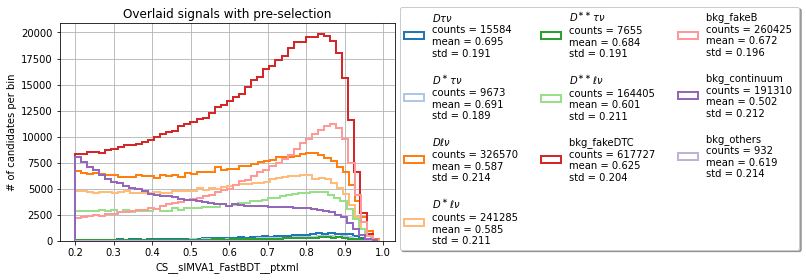

In [49]:
util.plot_projection(samples,cut='BFake__slMVA2_2_FastBDT__ptxml>0.15 and DTCFake__slMVA2_1_FastBDT__ptxml>0.15 and CS__slMVA1_FastBDT__ptxml>0.2',variable='CS__slMVA1_FastBDT__ptxml')
#CS__slMVA1_FastBDT__ptxml, DTCFake__slMVA2_1_FastBDT__ptxml, BFake__slMVA2_2_FastBDT__ptxml, BDTs__slAllBkg__slMVA3_FastBDT__ptxml

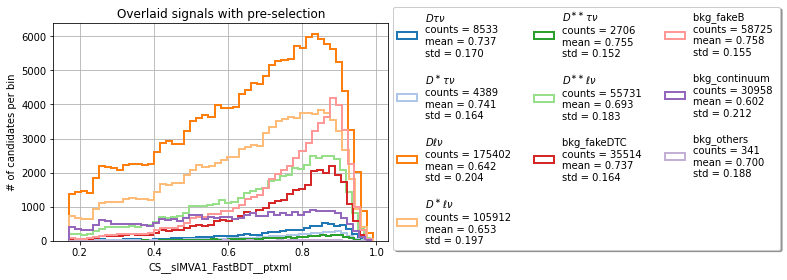

In [62]:
util.plot_projection(samples, cut='BDTs__slAllBkg__slMVA3_FastBDT__ptxml>0.8',variable='CS__slMVA1_FastBDT__ptxml')
#CS__slMVA1_FastBDT__ptxml, DTCFake__slMVA2_1_FastBDT__ptxml, BFake__slMVA2_2_FastBDT__ptxml, BDTs__slAllBkg__slMVA3_FastBDT__ptxml

# 2. Figure of merit

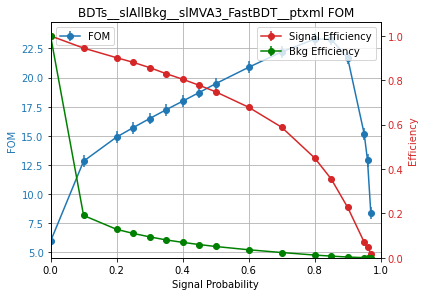

In [11]:
test_points = [0,0.1,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.6,0.7,0.8,0.85,0.9,0.95,0.96,0.97]
#CS__slMVA1_FastBDT__ptxml, DTCFake__slMVA2_1_FastBDT__ptxml, BFake__slMVA2_2_FastBDT__ptxml, BDTs__slAllBkg__slMVA3_FastBDT__ptxml
util.plot_FOM(sig_data=[sig_D_tau_nu],bkg_data=[bkg_fakeDTC, bkg_fakeB, bkg_continuum, bkg_others],
         variable='BDTs__slAllBkg__slMVA3_FastBDT__ptxml',test_points=test_points)

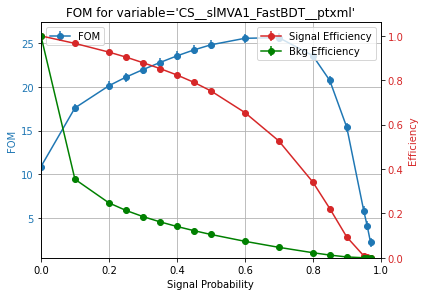

In [13]:
util.plot_FOM(sig_data=[sig_D_tau_nu],bkg_data=[bkg_continuum],
         variable='CS__slMVA1_FastBDT__ptxml',test_points=test_points)

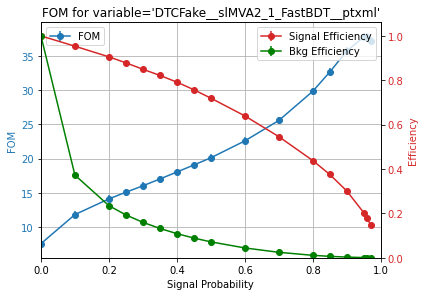

In [14]:
util.plot_FOM(sig_data=[sig_D_tau_nu],bkg_data=[bkg_fakeDTC],
         variable='DTCFake__slMVA2_1_FastBDT__ptxml',test_points=test_points)

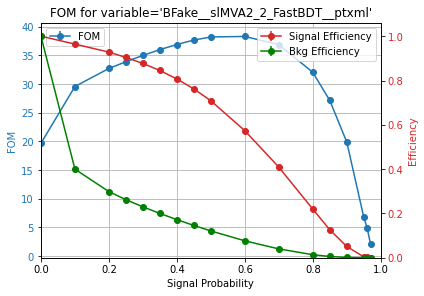

In [15]:
util.plot_FOM(sig_data=[sig_D_tau_nu],bkg_data=[bkg_fakeB],
         variable='BFake__slMVA2_2_FastBDT__ptxml',test_points=test_points)

In [38]:
test_points3d = [[0.25, 0.3, 0.35, 0.4, 0.45], [0.5, 0.55, 0.6, 0.65], [0.5,0.55,0.6,0.65]]
util.calculate_FOM3d(sig_data=[sig_D_tau_nu],bkg_data=[bkg_fakeDTC, bkg_fakeB, bkg_continuum, bkg_others],
         variables=['CS__slMVA1_FastBDT__ptxml','DTCFake__slMVA2_1_FastBDT__ptxml','BFake__slMVA2_2_FastBDT__ptxml'],
                test_points=test_points3d)

BDT_FOM=[21.14, 21.26, 21.07, 20.75, 21.19, 21.31, 21.1, 20.77, 21.22, 21.34, 21.11, 20.79, 20.98, 21.09, 20.81, 20.54, 21.26, 21.39, 21.19, 20.87, 21.31, 21.43, 21.22, 20.87, 21.37, 21.48, 21.24, 20.9, 21.15, 21.26, 20.96, 20.68, 21.31, 21.44, 21.25, 20.95, 21.36, 21.49, 21.28, 20.95, 21.43, 21.55, 21.32, 21.0, 21.21, 21.33, 21.04, 20.77, 21.34, 21.48, 21.31, 21.03, 21.39, 21.52, 21.32, 21.03, 21.47, 21.6, 21.38, 21.08, 21.27, 21.39, 21.1, 20.86, 21.26, 21.4, 21.21, 20.94, 21.32, 21.46, 21.24, 20.95, 21.42, 21.55, 21.32, 21.03, 21.22, 21.36, 21.05, 20.83]
BDT_sigEff=[0.48, 0.44, 0.39, 0.34, 0.45, 0.41, 0.37, 0.32, 0.43, 0.39, 0.35, 0.3, 0.4, 0.36, 0.32, 0.28, 0.47, 0.43, 0.38, 0.33, 0.44, 0.4, 0.36, 0.31, 0.42, 0.38, 0.34, 0.29, 0.39, 0.36, 0.31, 0.27, 0.45, 0.41, 0.37, 0.32, 0.43, 0.39, 0.35, 0.3, 0.4, 0.37, 0.33, 0.28, 0.38, 0.35, 0.31, 0.27, 0.44, 0.4, 0.36, 0.31, 0.42, 0.38, 0.34, 0.29, 0.39, 0.36, 0.32, 0.28, 0.36, 0.33, 0.3, 0.26, 0.42, 0.39, 0.34, 0.3, 0.4, 0.37, 0.33, 0.28, 0.